# Final Project

Due Date:  11:59pm on Wednesday, December 7th

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from P201_Functions import *

## Question 1 - Experiment Design 

In the Jupyter Notebook called Fitting_Examples.ipynb (you can find this in the ~/JupyterNotebooks/fitting directory), the last few examples considered cases where the uncertainty in the data became larger at small x-values. We considered three scenarios for collecting the data - one where we focused on small x-values, and two others that covered larger ranges of x.

For this question, begin with the Jupyter Notebook above, and modify it to consider 10 x-value ranges that keep the minimum value of the range constant (and fairly close to zero) while varying the maximum x-value from small to larger values. For each x-value range, calculate the uncertainty in the y-intercept, and then create a plot of the uncertainty as a function of that maximum x-value of the range.

Now, consider keeping the maximum x-value of the range constant, and vary the minimum value of the range from a small value, close to zero, to a larger value that is close to the maximum value. Create a plot of the uncertainty in the y-intercept as a function of the minimum x-value of the range.

What can you conclude from this study about the optimal experiment design?

In [2]:
# create some fake data

npts = 11
xlow = 0.25
# pick some generally arbitrary xhigh values from 1 to 1000
xhighs = [5,10,20,40,75,100,300,500,750,1000]

x = [np.linspace(xlow,xhigh,npts) for xhigh in xhighs]
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)

# The "equation" that we will fit in all of these examples is the line y=x.  Thus, we expect,
# in all cases, a slope of 1 and a y-intercept of 0.

y = [xi + yrandom for xi in x]

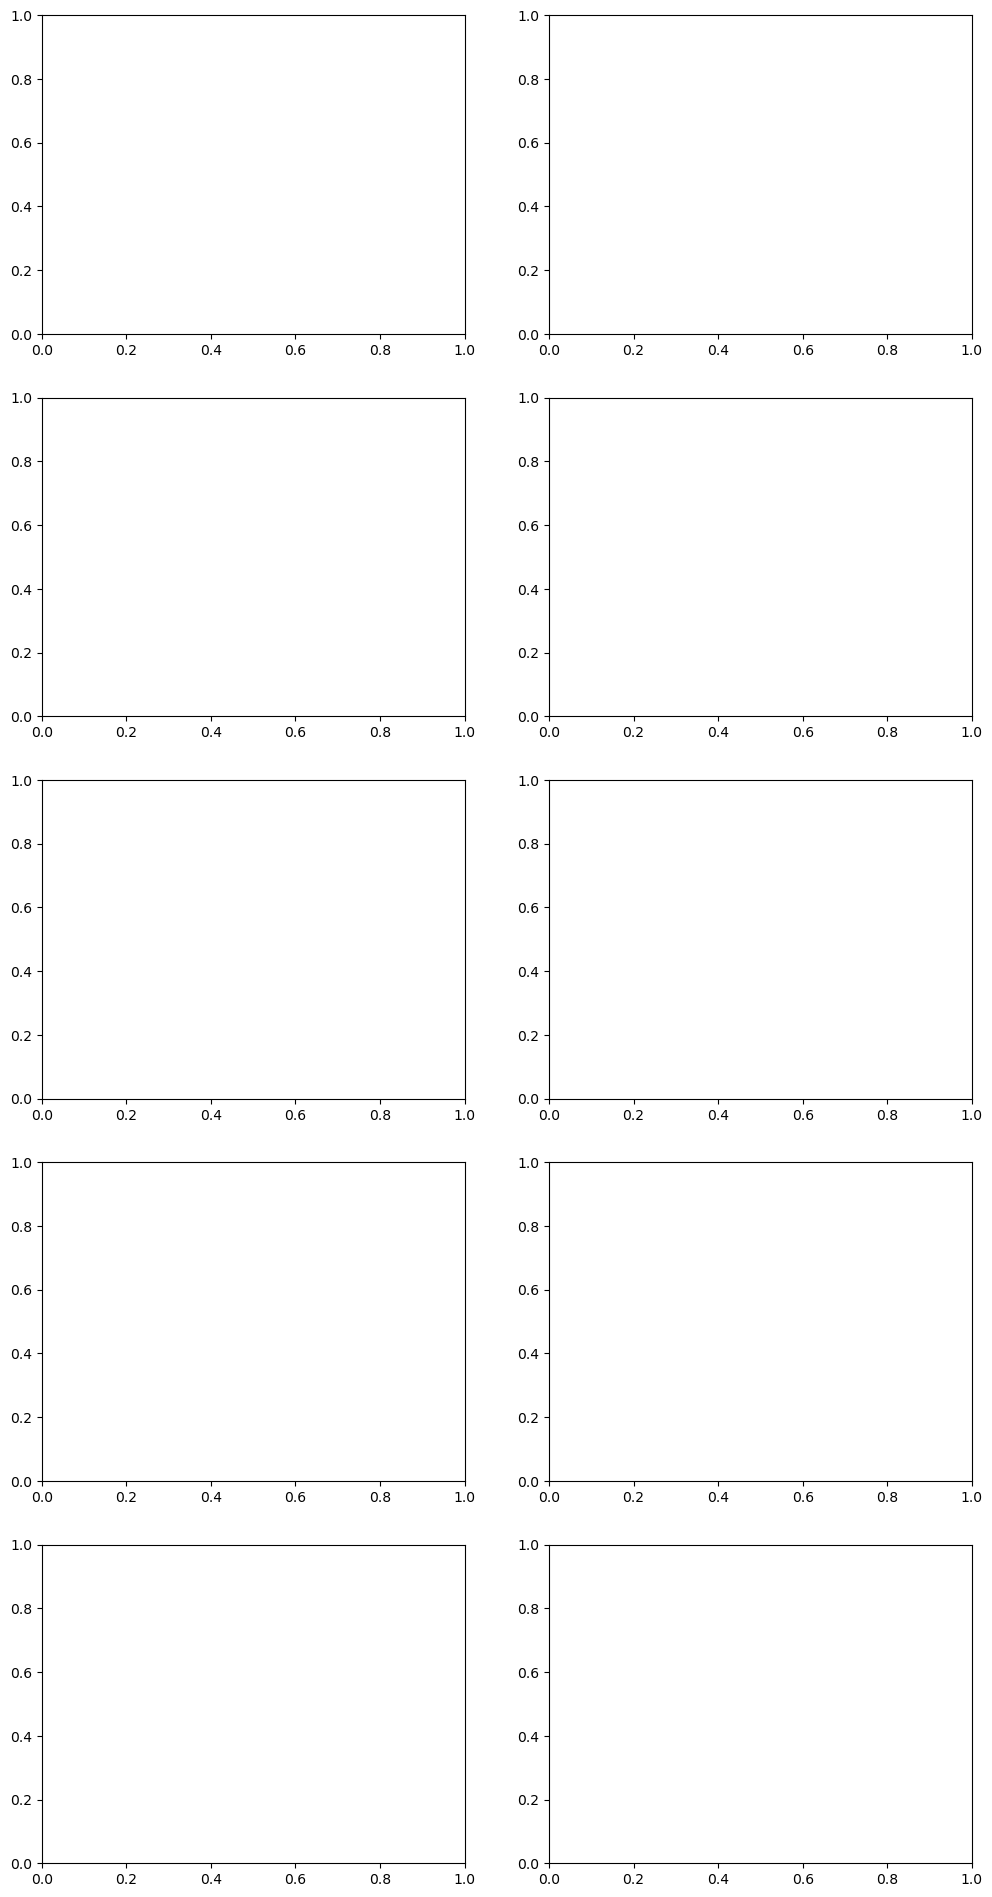

In [3]:
plt.rcParams["figure.figsize"] = (12,24)

figure, axis = plt.subplots(5, 2)
plot1 = plt.subplot2grid((5, 2), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((5, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((5, 2), (2, 0), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((5, 2), (3, 0), rowspan=1, colspan=1)
plot5 = plt.subplot2grid((5, 2), (4, 0), rowspan=1, colspan=1)
plot6 = plt.subplot2grid((5, 2), (0, 1), rowspan=1, colspan=1)
plot7 = plt.subplot2grid((5, 2), (1, 1), rowspan=1, colspan=1)
plot8 = plt.subplot2grid((5, 2), (2, 1), rowspan=1, colspan=1)
plot9 = plt.subplot2grid((5, 2), (3, 1), rowspan=1, colspan=1)
plot10 = plt.subplot2grid((5, 2), (4, 1), rowspan=1, colspan=1)

plots = [plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10]

Linear Fit: Coefficients (from curve_fit)
[0.15563316 0.95190317]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.01732916 -0.00497318]
 [-0.00497318  0.00189454]]

Linear Fit: Final Result: y = (0.95190 +/- 0.04353) x + (0.15563 +/- 0.13164)

Linear Fit: Coefficients (from curve_fit)
[0.14946688 0.97656821]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.01608512 -0.0023045 ]
 [-0.0023045   0.00044966]]

Linear Fit: Final Result: y = (0.97657 +/- 0.02121) x + (0.14947 +/- 0.12683)

Linear Fit: Coefficients (from curve_fit)
[0.14650081 0.98843241]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.01550891 -0.00110956]
 [-0.00110956  0.00010959]]

Linear Fit: Final Result: y = (0.98843 +/- 0.01047) x + (0.14650 +/- 0.12453)

Linear Fit: Coefficients (from curve_fit)
[0.1450458  0.99425258]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 1.52315364e-02 -5.44445851e-04]
 [-5.44445851e-04  2.70532067e-05]]

Linear Fit: Final Result: y = (0.99425 +/- 0.00520) x + (0.14505 +/- 0.

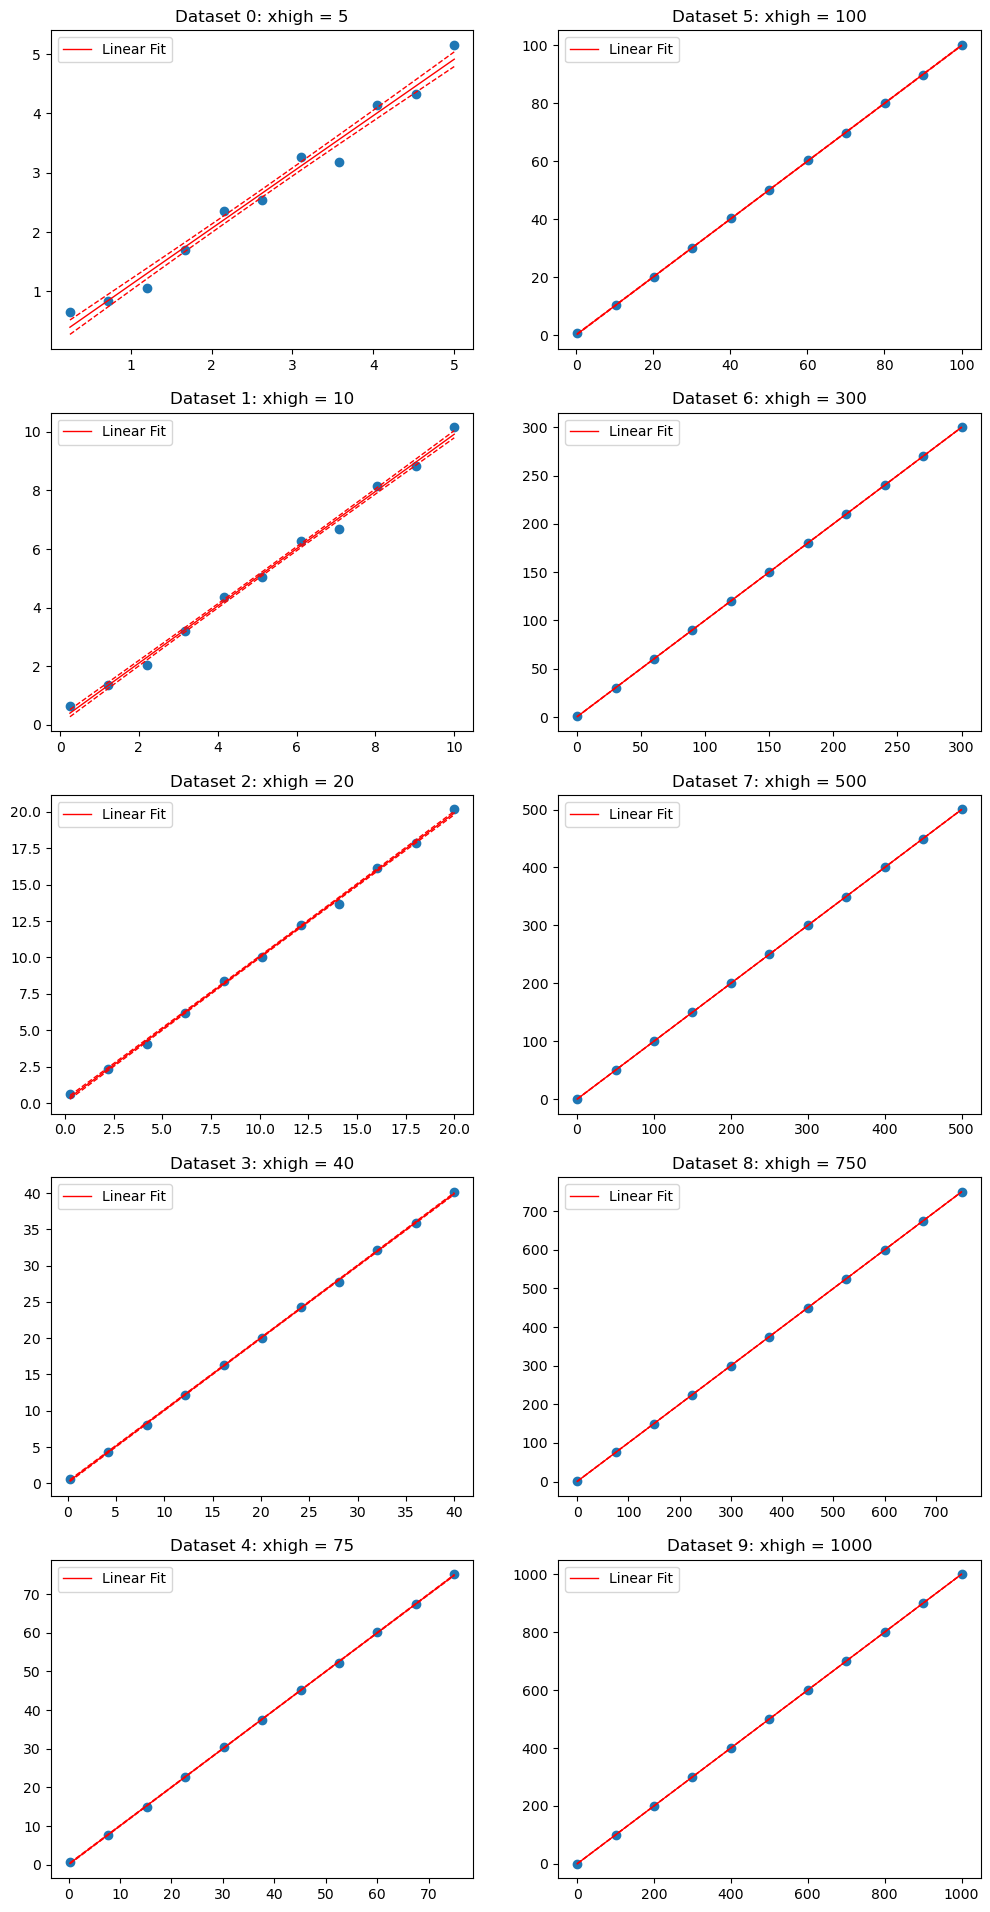

In [4]:
# Takes the x and y values to make a trendline
#
# The function called linear_fit_plot() is defined externally, and takes five parameters:
# 1. Vector of x data
# 2. Vector of y data
# 3. Name of the panel in which to plot the data
# 4. Low value of x to consider
# 5. High value of x to consider
#
# The function returns the y-intercept and slope, as well as the uncertainties in these values.

slope = []
dslope = []
yint = []
dyint = []
type = []

for i in range(10):
    plots[i].plot(x[i],y[i],'o')
    plots[i].set_title(f"Dataset {i}: xhigh = {xhighs[i]}")
    b, m, db, dm = linear_fit_plot(x[i],y[i],plots[i],0.0,xhighs[i]+1)
    plots[i].legend()
    slope.append(m)
    dslope.append(dm)
    yint.append(b)
    dyint.append(db)
    type.append('None')


# Plot the entire figure(s), which will now include the fit to the data
# The solid red line indicates the line of best fit, and the dashed lines indicate
# a 95% confidence band, based on the determined uncertainties.

figure

Text(0.5, 1.0, 'y-intercept uncertainty vs. maximum x value')

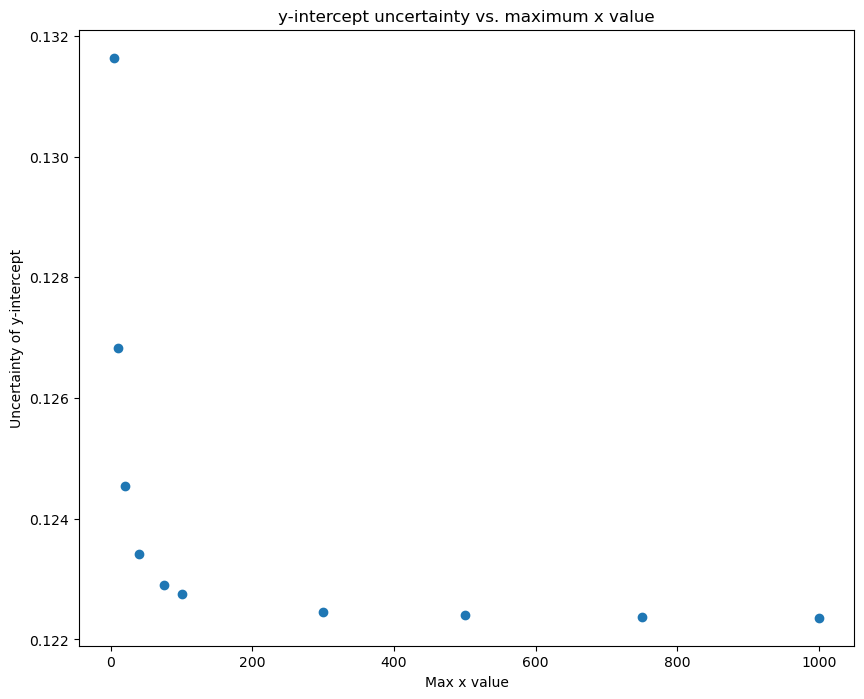

In [5]:
# Create plot of y-intercept uncertainty as a function of the maximum x value

plt.rcParams["figure.figsize"] = (10,8)

fig = plt.figure()
plt.plot(xhighs, dyint, 'o')
plt.xlabel("Max x value")
plt.ylabel("Uncertainty of y-intercept")
plt.title("y-intercept uncertainty vs. maximum x value")

In [6]:
# Do it again, but vary minimum x-value instead

# create some fake data

npts = 11
xlows = [0.5, 5, 10, 15, 20, 25, 30, 35, 40, 45]
# pick some generally arbitrary xhigh values from 1 to 1000
xhigh = 50

x = [np.linspace(xlow,xhigh,npts) for xlow in xlows]
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)

# The "equation" that we will fit in all of these examples is the line y=x.  Thus, we expect,
# in all cases, a slope of 1 and a y-intercept of 0.

y = [xi + yrandom for xi in x]

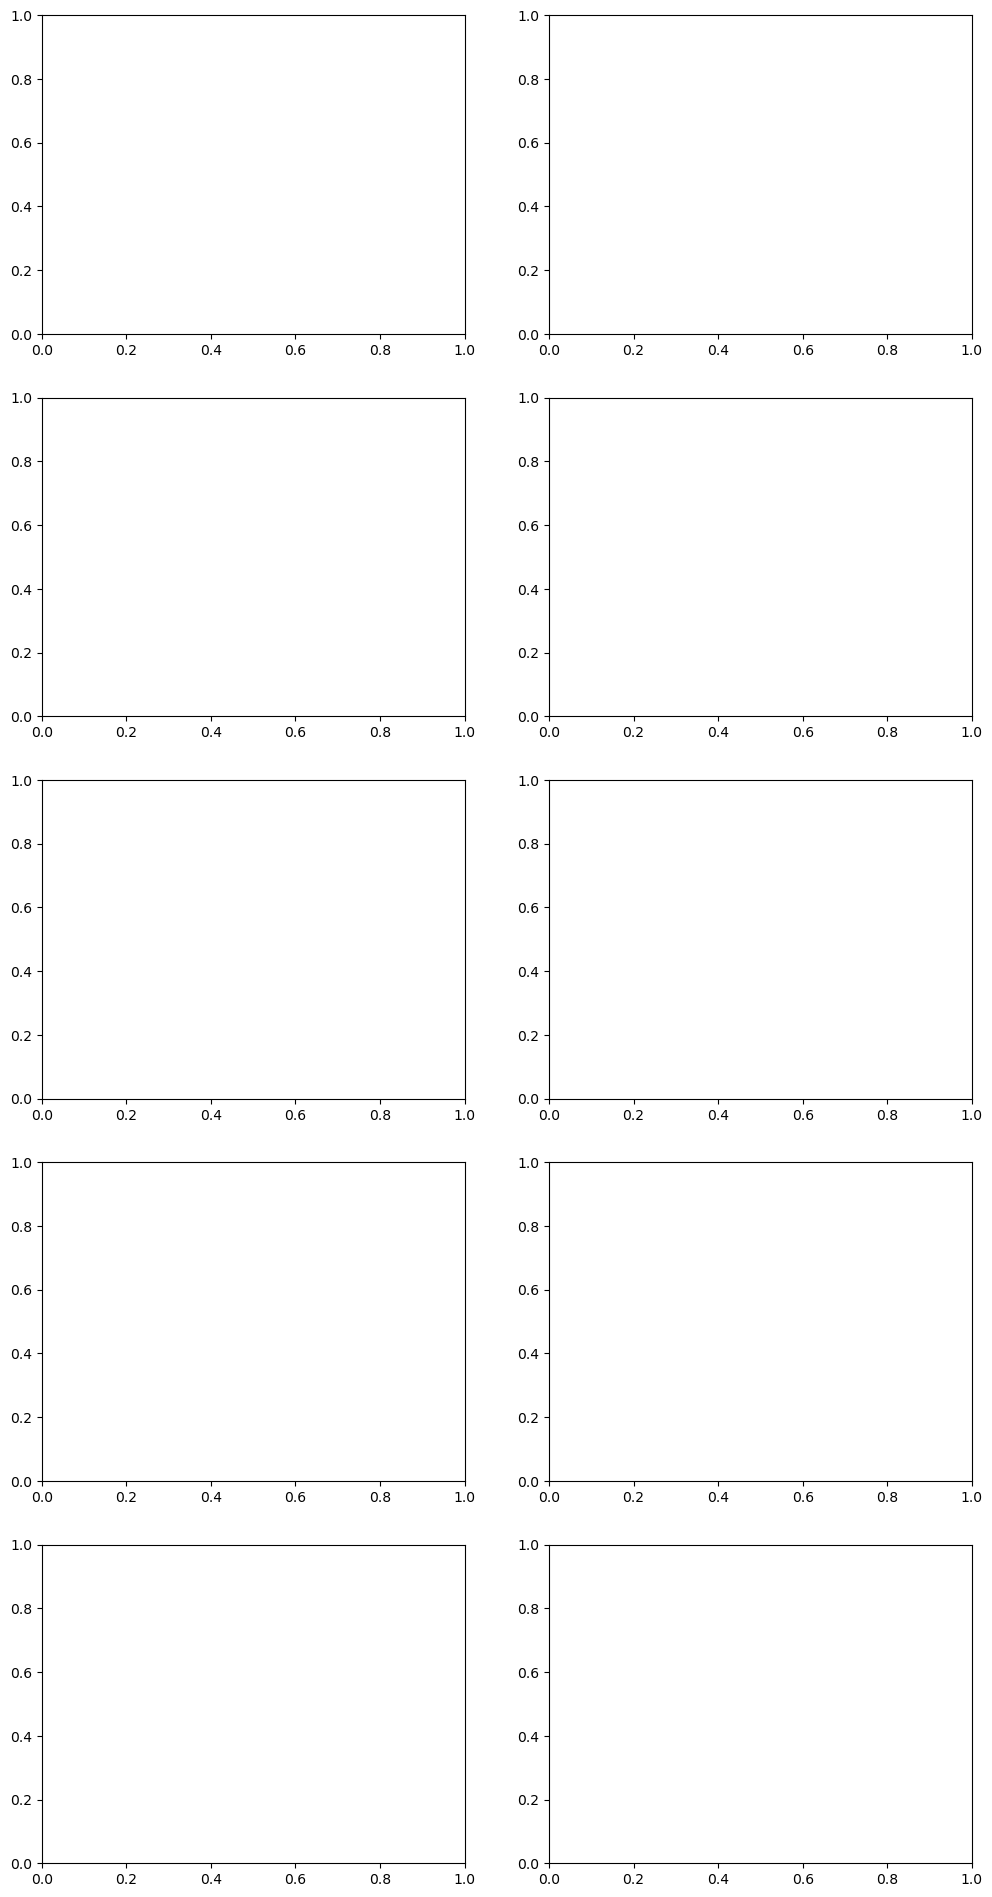

In [7]:
plt.rcParams["figure.figsize"] = (12,24)

figure, axis = plt.subplots(5, 2)
plot1 = plt.subplot2grid((5, 2), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((5, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((5, 2), (2, 0), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((5, 2), (3, 0), rowspan=1, colspan=1)
plot5 = plt.subplot2grid((5, 2), (4, 0), rowspan=1, colspan=1)
plot6 = plt.subplot2grid((5, 2), (0, 1), rowspan=1, colspan=1)
plot7 = plt.subplot2grid((5, 2), (1, 1), rowspan=1, colspan=1)
plot8 = plt.subplot2grid((5, 2), (2, 1), rowspan=1, colspan=1)
plot9 = plt.subplot2grid((5, 2), (3, 1), rowspan=1, colspan=1)
plot10 = plt.subplot2grid((5, 2), (4, 1), rowspan=1, colspan=1)

plots = [plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10]

Linear Fit: Coefficients (from curve_fit)
[0.20220331 0.99653231]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 1.18454915e-02 -3.38888355e-04]
 [-3.38888355e-04  1.34213212e-05]]

Linear Fit: Final Result: y = (0.99653 +/- 0.00366) x + (0.20220 +/- 0.10884)

Linear Fit: Coefficients (from curve_fit)
[0.21954171 0.99618555]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 1.55699015e-02 -4.46594110e-04]
 [-4.46594110e-04  1.62397841e-05]]

Linear Fit: Final Result: y = (0.99619 +/- 0.00403) x + (0.21954 +/- 0.12478)

Linear Fit: Coefficients (from curve_fit)
[0.24338205 0.99570874]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 2.17867082e-02 -6.16604791e-04]
 [-6.16604791e-04  2.05534899e-05]]

Linear Fit: Final Result: y = (0.99571 +/- 0.00453) x + (0.24338 +/- 0.14760)

Linear Fit: Coefficients (from curve_fit)
[0.27403385 0.9950957 ]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 3.16439600e-02 -8.72473871e-04]
 [-8.72473871e-04  2.68453512e-05]]

Linear Fit: Final Resul

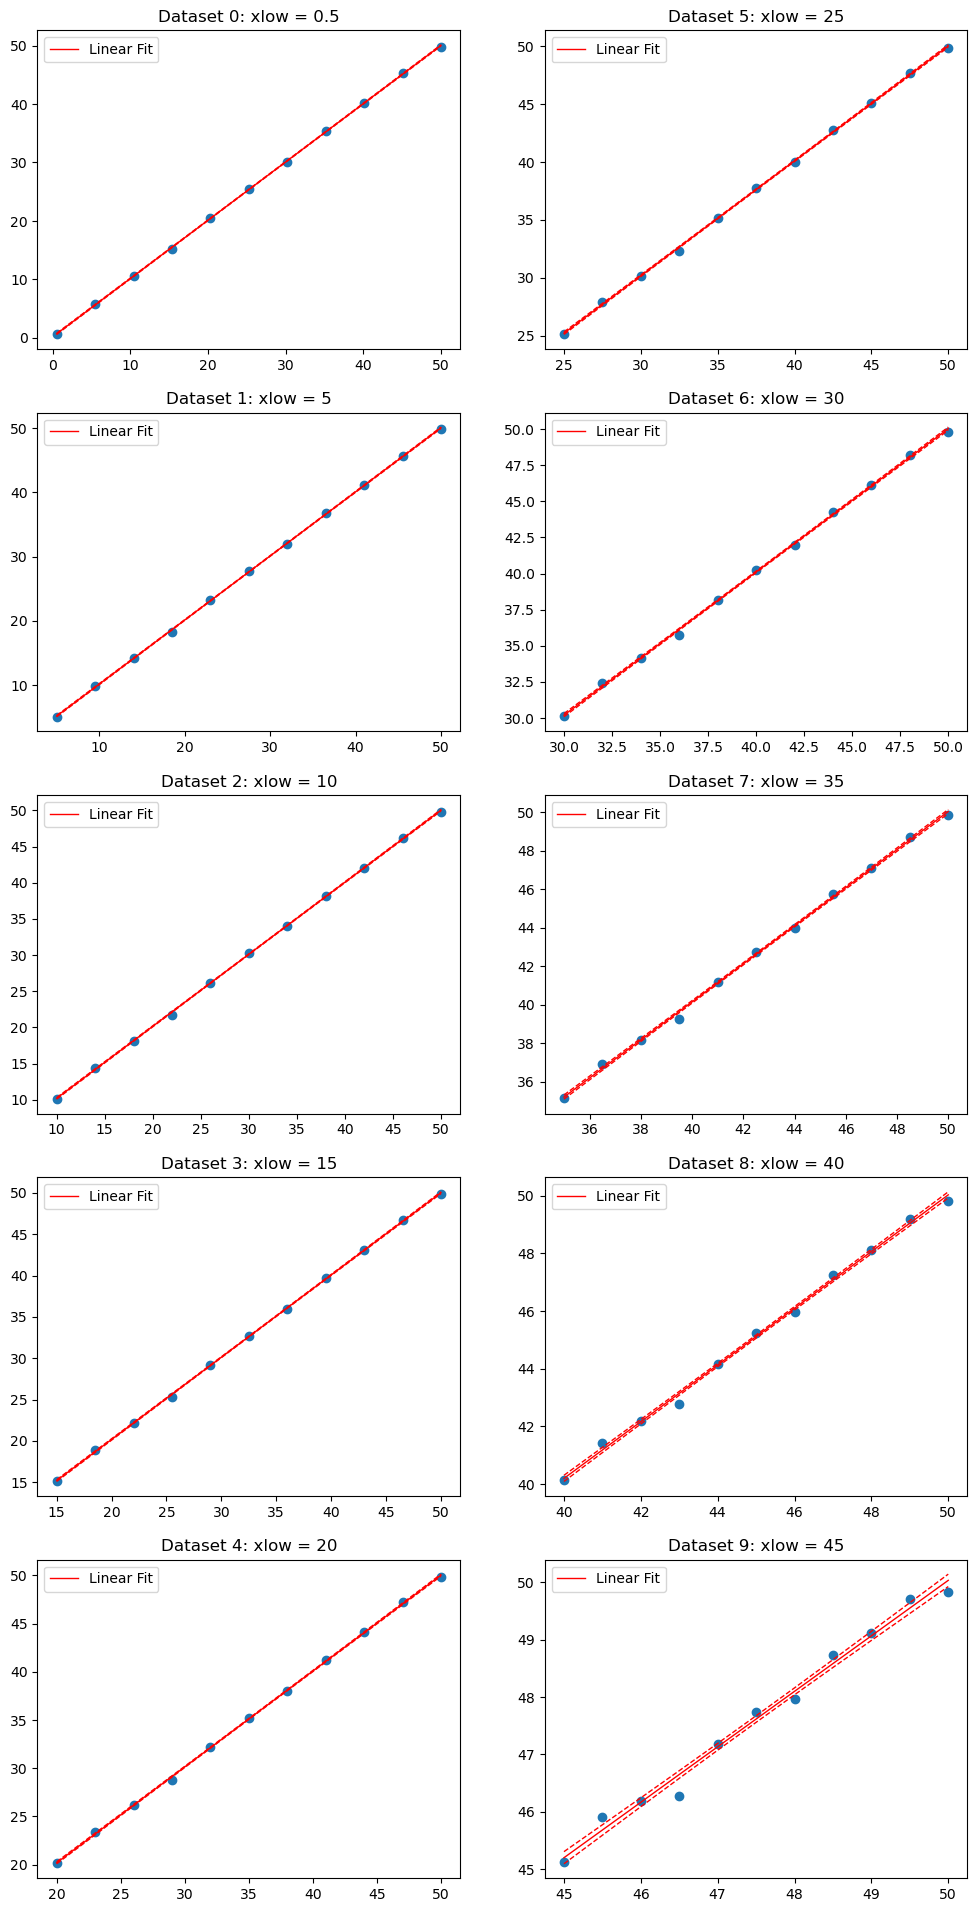

In [8]:
# Takes the x and y values to make a trendline
#
# The function called linear_fit_plot() is defined externally, and takes five parameters:
# 1. Vector of x data
# 2. Vector of y data
# 3. Name of the panel in which to plot the data
# 4. Low value of x to consider
# 5. High value of x to consider
#
# The function returns the y-intercept and slope, as well as the uncertainties in these values.

slope = []
dslope = []
yint = []
dyint = []
type = []

for i in range(10):
    plots[i].plot(x[i],y[i],'o')
    plots[i].set_title(f"Dataset {i}: xlow = {xlows[i]}")
    b, m, db, dm = linear_fit_plot(x[i],y[i],plots[i],xlows[i]-0.5,51)
    plots[i].legend()
    slope.append(m)
    dslope.append(dm)
    yint.append(b)
    dyint.append(db)
    type.append('None')


# Plot the entire figure(s), which will now include the fit to the data
# The solid red line indicates the line of best fit, and the dashed lines indicate
# a 95% confidence band, based on the determined uncertainties.

figure

Text(0.5, 1.0, 'y-intercept uncertainty vs. minimum x value')

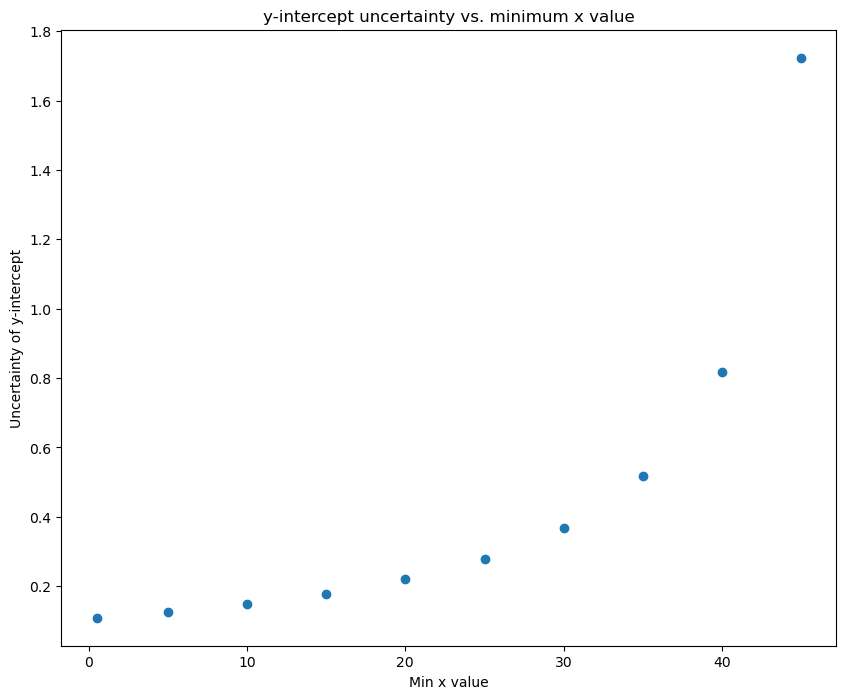

In [9]:
# Create plot of y-intercept uncertainty as a function of the minimum x value

plt.rcParams["figure.figsize"] = (10,8)

fig = plt.figure()
plt.plot(xlows, dyint, 'o')
plt.xlabel("Min x value")
plt.ylabel("Uncertainty of y-intercept")
plt.title("y-intercept uncertainty vs. minimum x value")

### What does this mean?

These plots show the importance of having a good range of data. As the x range gets smaller, the uncertainty of fitting gets higher. In terms of experimental design, one should collect data covering a wide range of values for the independent variable. It's hard to model a system when you only know a small portion of the behavior of that system.

## Question 2 - Experiment Simulation: Frogs and Lily Pads

Modify the Jupyter Notebook called frogger.ipynb to include the possibility that the frog can jump in either direction (not just forward). Use the following algorithm:

From wherever the frog is currently sitting (i.e. anywhere from the starting position to the last lily pad), it can jump to any other available position, including back to the starting position, or to the other side of the stream. The frog should continue jumping until that moment when it gets to the other side of the stream. The probability should be uniform/equal for jumping to any available position.

The goal here is to calculate the average number of jumps, as function of the number of lily pads.

Does the final result surprise you?

As a final check that your simulation is reasonable, plot the DISTRIBUTION of the number of jumps taken for N$_{lilypads}$ = 30.

## Question 3 - Real Experiment Analysis:  2016 Mazda CX-5 ODB Data

My current vehicle is a 2016 Mazda CX-5.  I purchased an ODB reader unit earlier this year, in order to diagnose the sources of a "Check Engine Light" situation.  In once instance last August, I recorded some data using the ODB reader, and then exported this data into a CSV file, in the format the the ODB reader manufacturer specified.   You can find that data file in ~/JupyterNotebooks/ODB/Mazda_CX5_2016_08122022.csv

I have provided a VERY basic Jupyter Notebook that illustrates how to read this data file into a Pandas dataframe, look at the format of data, and then how to extract a particular PID signal from the data and plot it.

The task for this question is for you to look at ALL of the data recorded, and then create plots of quantities that you think might be useful or interesting, as a function of recording time.  In particular, it should be interesting to look at the CORRELATIONS between various PID signals.  That is, Incidentally, the Check Engine code that was thrown that sent me down the path was related to an under-performing catalytic converter.  This is why I recorded data for the upstream and downstream oxygen sensors, and the catalytic converter temperature.

This is an open-ended task, and there is no right answer here!  The point is for you to exercise your sense of creativity, together with your knowledge of data analysis techniques that you may have learned in this course, other courses, or through other experiences.